# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units

    # city_weather = requests.get(city_url).json()
    # city_weather
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
         city_weather = requests.get(city_url).json()
         #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
         city_lat = city_weather["coord"]['lat']
         city_lng = city_weather["coord"]['lon']
         city_max_temp = city_weather["main"]['temp_max']
         city_humidity = city_weather["main"]['humidity']
         city_clouds = city_weather["clouds"]['all']
         city_wind = city_weather["wind"]['speed']
         city_country = city_weather["sys"]['country']
         city_date = city_weather["dt"]

#         # Append the City information into city_data list
         city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

     # If an error is experienced, skip the city
    except:
         print("City not found. Skipping...")
         pass
              
 # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | pangody
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | kirensk
Processing Record 7 of Set 1 | aasiaat
Processing Record 8 of Set 1 | la passe
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | keflavik
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | rawai
Processing Record 14 of Set 1 | lobujya
Processing Record 15 of Set 1 | tindouf
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | argo
Processing Record 18 of Set 1 | aykhal
Processing Record 19 of Set 1 | broome
Processing Record 20 of Set 1 | malango
Processing Record 21 of Set 1 | fale old settlement
Processing Record 22 of Set 1 | smach mean chey
City not found. Skipping...
Pro

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.4112,100.3354,26.96,69,20,3.60,MY,1705011181
1,hermanus,-34.4187,19.2345,20.47,85,81,2.91,ZA,1705011345
2,port-aux-francais,-49.3500,70.2167,5.97,94,100,13.04,TF,1705011346
3,pangody,65.8500,74.4859,-26.87,94,86,6.60,RU,1705011346
4,puerto natales,-51.7236,-72.4875,16.25,51,75,9.26,CL,1705011346


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,26.96,69,20,3.60,MY,1705011181
1,hermanus,-34.4187,19.2345,20.47,85,81,2.91,ZA,1705011345
2,port-aux-francais,-49.3500,70.2167,5.97,94,100,13.04,TF,1705011346
3,pangody,65.8500,74.4859,-26.87,94,86,6.60,RU,1705011346
4,puerto natales,-51.7236,-72.4875,16.25,51,75,9.26,CL,1705011346


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

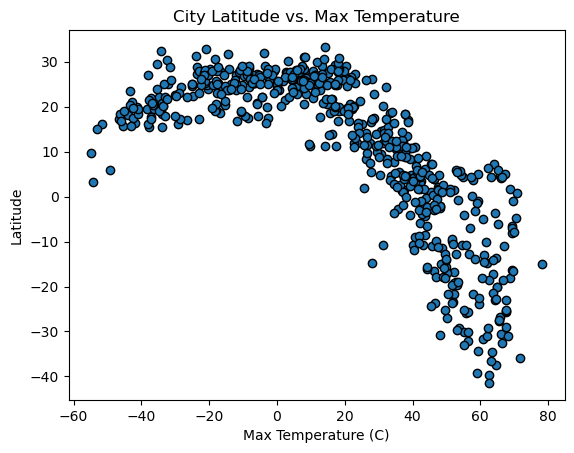

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor= 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Max Temperature (C)')
plt.ylabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

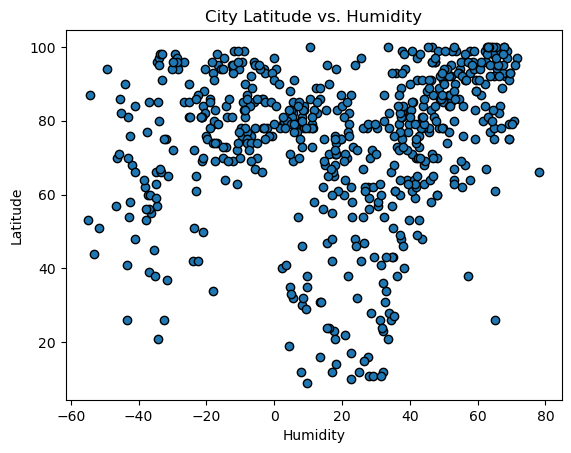

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor= 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Humidity')
plt.ylabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

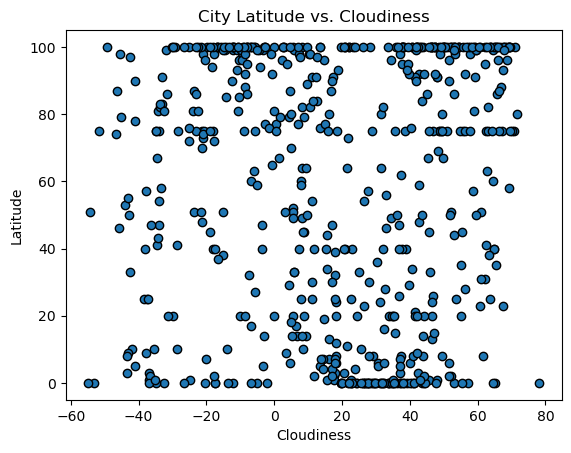

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor= 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

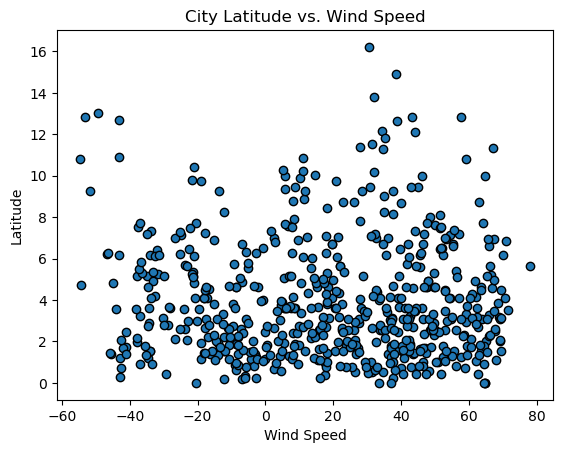

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor= 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):

    #Linear regression plotting
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="black")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head(50)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,26.96,69,20,3.60,MY,1705011181
3,pangody,65.8500,74.4859,-26.87,94,86,6.60,RU,1705011346
5,kirensk,57.7853,108.1119,-21.58,99,98,1.26,RU,1705011346
6,aasiaat,68.7098,-52.8699,-18.10,99,96,3.85,GL,1705011346
7,la passe,45.5549,-0.8967,1.13,77,1,5.59,FR,1705011346
9,thompson,55.7435,-97.8558,-25.91,76,75,1.54,CA,1705011347
10,keflavik,64.0049,-22.5624,7.24,100,100,3.09,IS,1705011347
12,rawai,7.7797,98.3253,25.06,80,60,6.26,TH,1705011347
13,lobujya,27.9500,86.8167,-14.75,11,0,4.03,NP,1705011347


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,-30.0),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The r-value is: {rvalue**2}')
plt.show

In [ ]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25.0,7.0),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The r-value is: {rvalue**2}')
plt.show

**Discussion about the linear relationship:** The relationship between maximum temperature and latitude in the northern hemisphere is strong and positive. This means that as we move towards north away from the equator, the maximum temperature decreases. In the southern hemisphere, this relationship is weaker but still positive, indicating decreasing  temperatures as we go further south of the equator.

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45.0,27.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is: {rvalue**2}')
plt.show

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25.0,20.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is: {rvalue**2}')
plt.show

**Discussion about the linear relationship:** There are no significant statistical links between humidity and latitude, both north and south of the equator.

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(47.5,28.3),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-value is: {rvalue**2}')
plt.show

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45.0,30.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-value is: {rvalue**2}')
plt.show

**Discussion about the linear relationship:** There are no significant statistical connections between cloudiness and latitude in both the northern and southern hemispheres. 

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.0,15.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-value is: {rvalue**2}')
plt.show

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50.0,12.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-value is: {rvalue**2}')
plt.show

**Discussion about the linear relationship:** Statistically significant relationships between wind speed and latitude are not evident in either the northern or southern hemispheres.